In [28]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# path where cleaned data is saved
counter_data_path = '../data/interim/counter_readings_{}.csv'

from dotenv import load_dotenv, find_dotenv
assert load_dotenv(find_dotenv())

counter_ids = [
    912,  #
    1043, #
    1050, #
    1225, #
    922,  #
    1246, #
]

for cid in counter_ids:
    assert os.path.isfile(counter_data_path.format(cid))

In [89]:
time_series = dict()
for cid in counter_ids:
    time_series[cid] = pd.read_csv(counter_data_path.format(cid), 
                                   parse_dates=['StartTime', 'EndTime'],
                                   dtype={
                                       'CounterReadingID': int,
                                       'Visits': int
                                   })
    
    # calculate the number of seconds between the reading start and end
    interval_seconds = (time_series[cid].EndTime  - time_series[cid].StartTime).dt.seconds
    # set values to nan for readings where the interval is longer than 1 hour
    time_series[cid][interval_seconds > 3600] = np.nan
    
    time_series[cid].drop(columns=['CounterReadingID', 'EndTime'], inplace=True)
    
    time_series[cid].set_index('StartTime', inplace=True)
    time_series[cid] = time_series[cid].loc['2017-06-10':'2019-10-01', :]
    time_series[cid] = time_series[cid].resample('H').sum()
    time_series[cid].rename(columns={'Visits': cid}, inplace=True)

In [90]:
for cid in counter_ids:
    print(time_series[cid].shape)

(20256, 1)
(20256, 1)
(20256, 1)
(20256, 1)
(20256, 1)
(20256, 1)


In [91]:
time_series[cid]

,1246
StartTime,
2017-06-10 00:00:00,0.0
2017-06-10 01:00:00,0.0
2017-06-10 02:00:00,0.0
2017-06-10 03:00:00,1.0
2017-06-10 04:00:00,0.0
...,...
2019-10-01 19:00:00,1.0
2019-10-01 20:00:00,0.0
2019-10-01 21:00:00,0.0


In [92]:
time_series_combined = pd.concat(time_series.values(), axis=1)

In [93]:
time_series_combined

,912,1043,1050,1225,922,1246
StartTime,,,,,,
2017-06-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-10 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-10 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-10 03:00:00,0.0,0.0,0.0,0.0,0.0,1.0
2017-06-10 04:00:00,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
2019-10-01 19:00:00,0.0,0.0,2.0,0.0,0.0,1.0
2019-10-01 20:00:00,2.0,0.0,0.0,0.0,0.0,0.0
2019-10-01 21:00:00,0.0,0.0,1.0,0.0,0.0,0.0


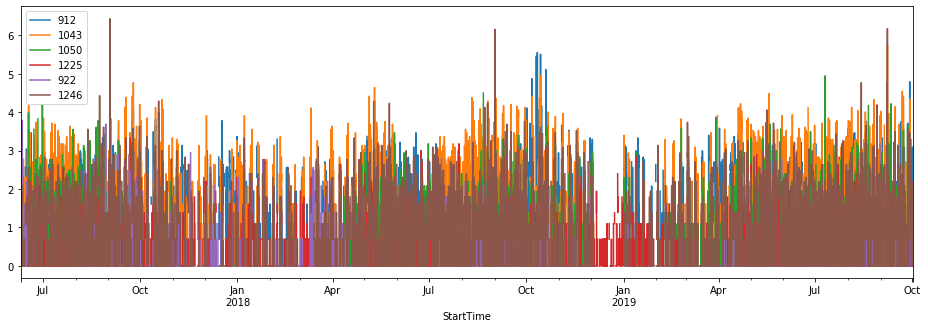

In [98]:
_ = time_series_combined.apply(np.log).plot(figsize=(16, 5))